In [1]:
#1.-Import libraries
#2.-Load data
#3.-Understanding the data
#4.-EDA
#5.-Data wrangling outliers
#6.-Model

In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('weight-height.csv')

In [5]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
df.shape

(10000, 3)

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


In [10]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

<AxesSubplot:>

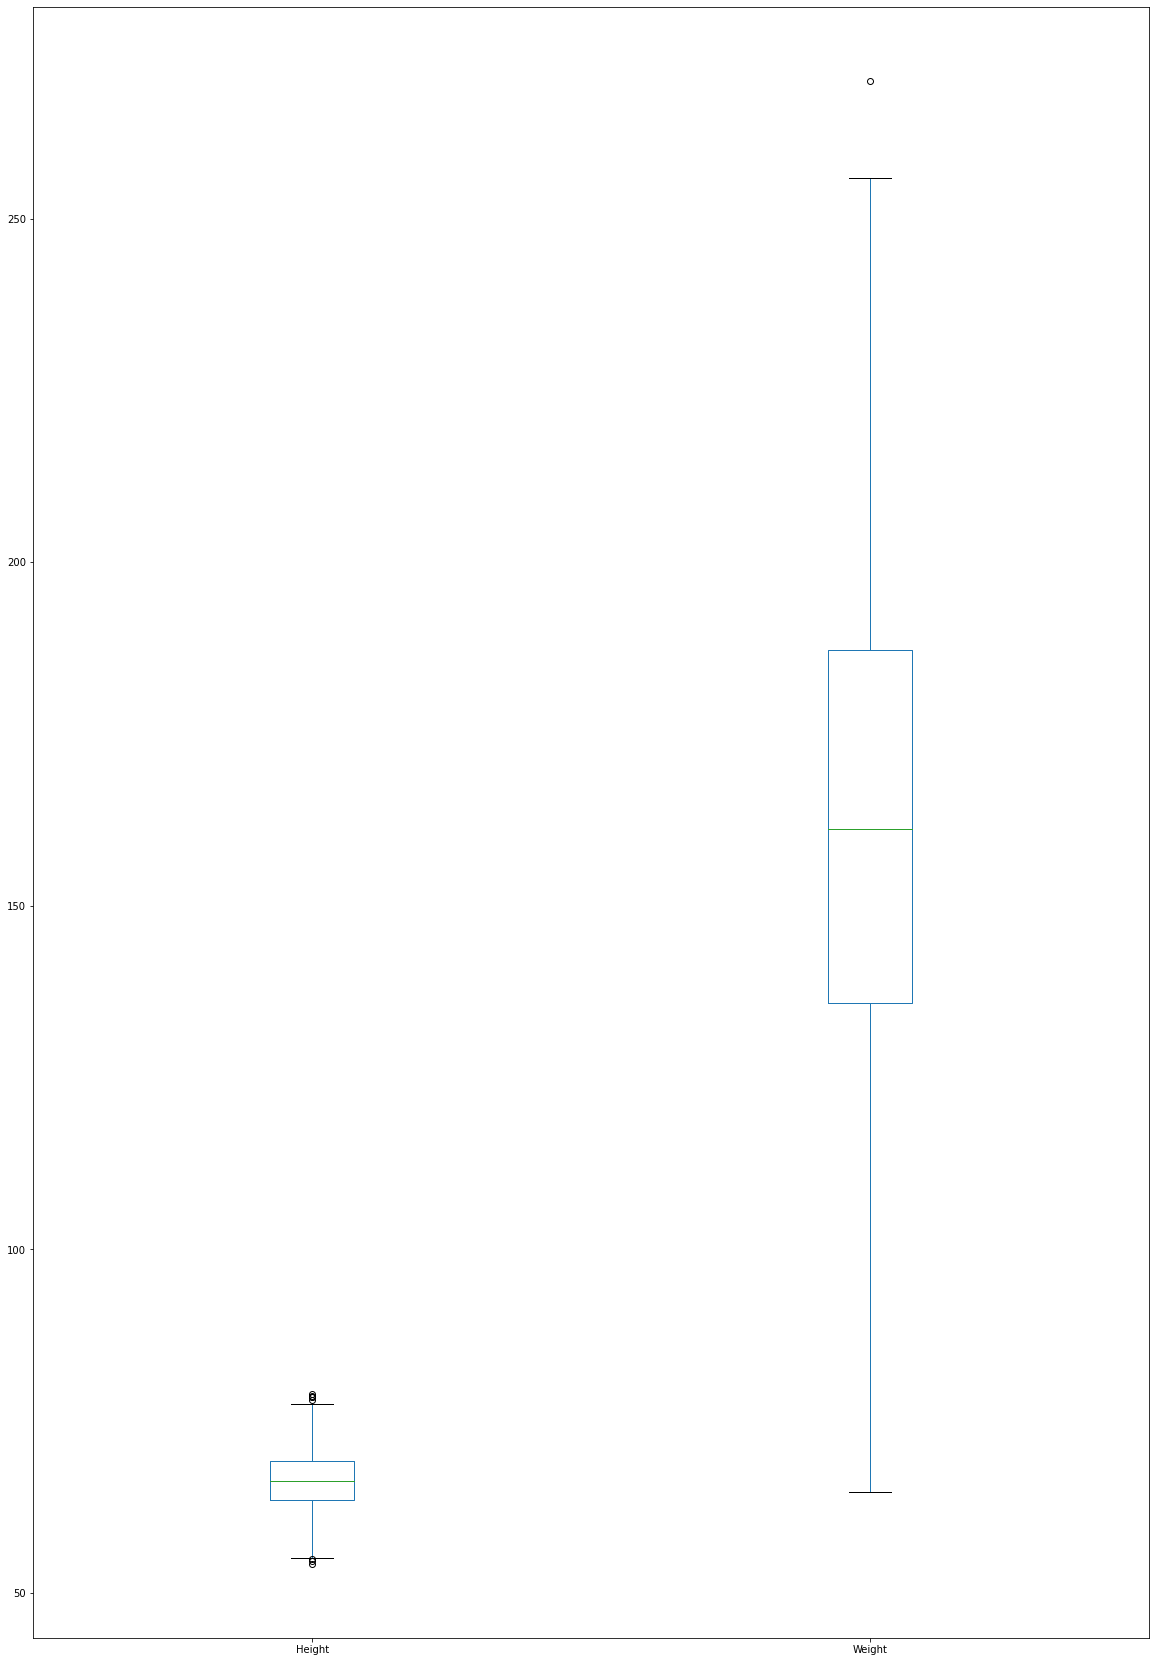

In [11]:
df.plot(kind='box',figsize=(20,30))

In [12]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

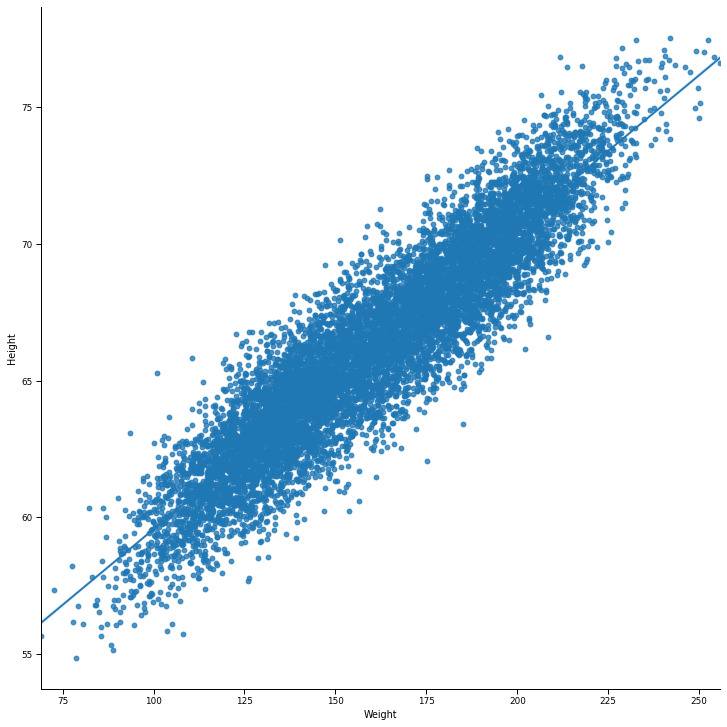

In [50]:
sns.set_context("paper")
sns.lmplot(x='Weight',y='Height',data=df,size=10)

# Outliers

In [13]:
from scipy import stats

z = np.abs (stats.zscore(df))
print(z)

df = df[(z<3).all(axis=1)]

[[1.         1.94406149 2.50579697]
 [1.         0.62753668 0.02710064]
 [1.         2.01244346 1.59780623]
 ...
 [1.         0.64968792 1.02672965]
 [1.         0.69312469 0.07512745]
 [1.         1.14970831 1.48850724]]


<AxesSubplot:>

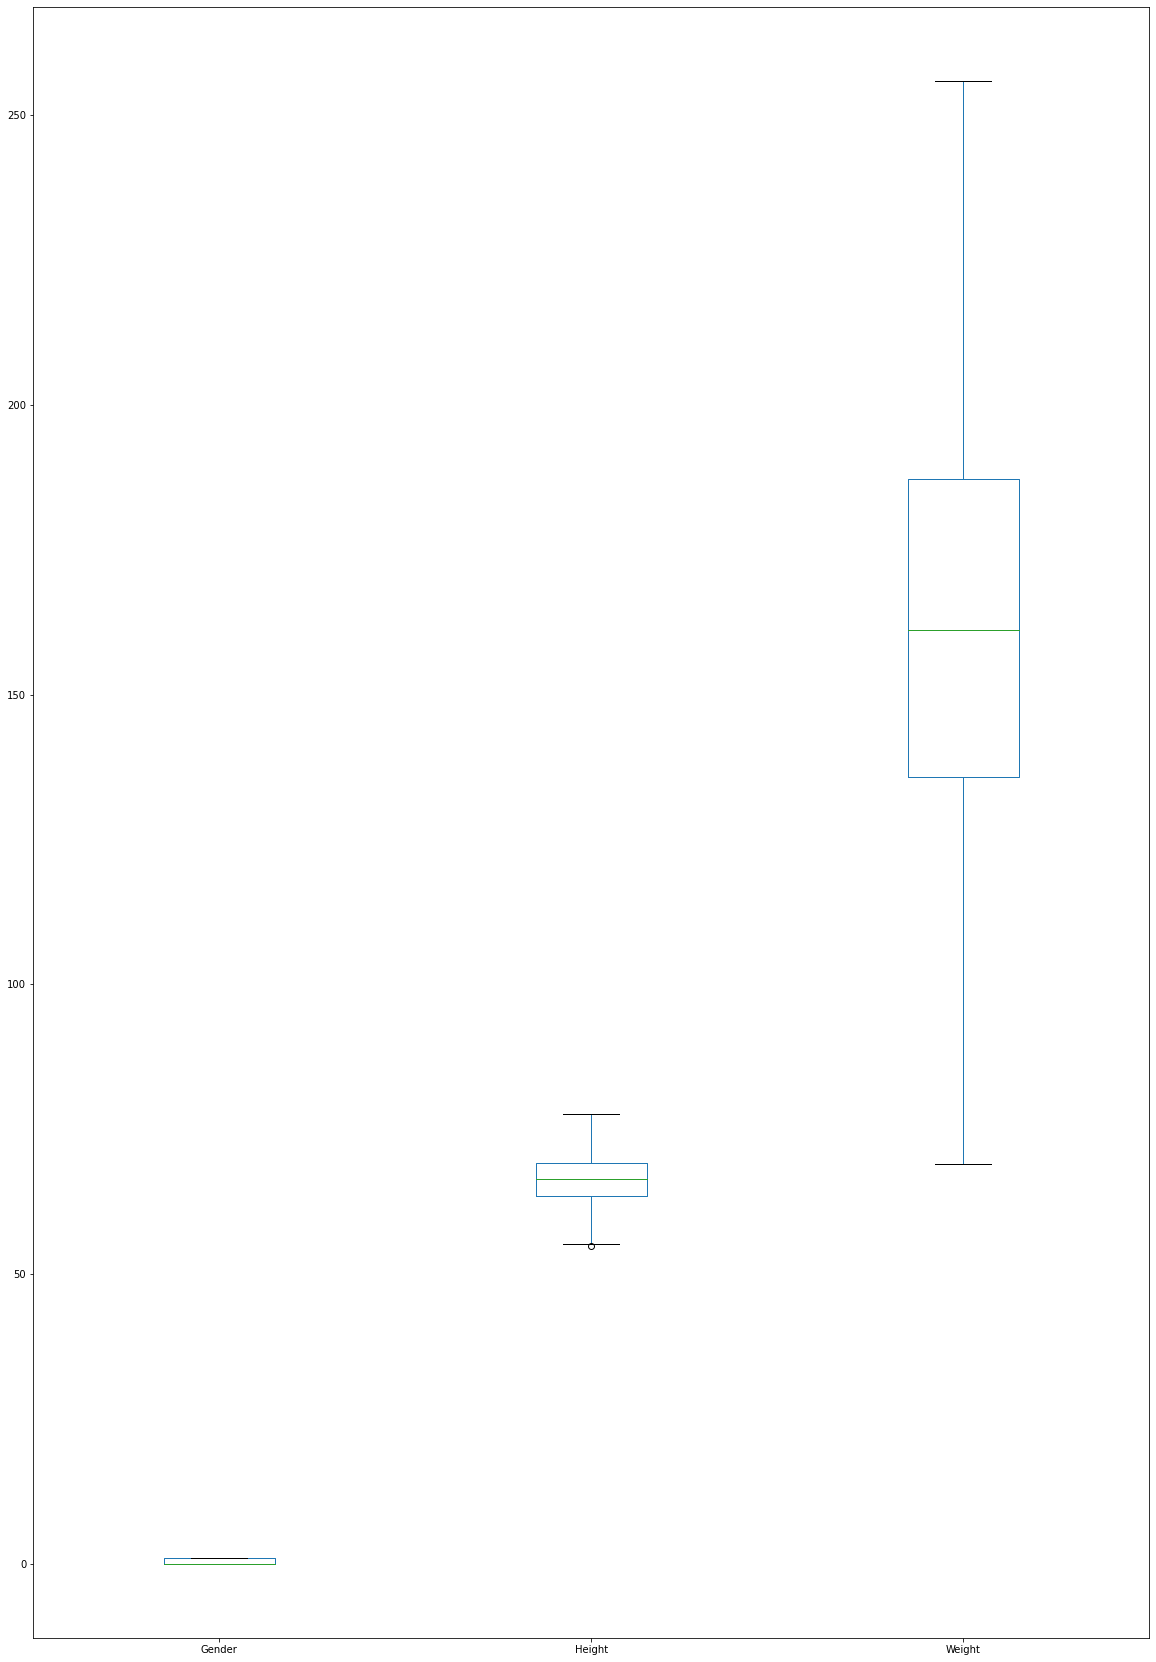

In [14]:
df.plot(kind='box',figsize=(20,30))

# Train test split

In [15]:
X = df.drop(['Weight'],axis=1)
y = df['Weight']

In [42]:
def clas(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.2, random_state = 10)
    model.fit(X_train,y_train)
    print('Accuracy: ', model.score(X_test,y_test)*100)
    y_pred = model.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))    
    sns.distplot((y_test-y_pred),bins=50);

# Model training

Accuracy:  90.54444539489585
MAE: 7.883321631945946
MSE: 96.8424070507906
RMSE: 9.840853979751483


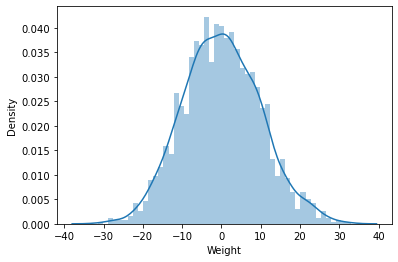

In [43]:
model = LinearRegression()
clas(model,X,y)